<a href="https://colab.research.google.com/github/aroka007/Deep-Learning/blob/main/Bone_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf        
import pandas as pd     
import matplotlib.pyplot as plt                 
from keras.preprocessing.image import ImageDataGenerator 
import seaborn as sea
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload() # Upload kaggle.json

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/rsna-bone-age

100% 9.29G/9.29G [02:25<00:00, 63.4MB/s]
100% 9.29G/9.29G [02:25<00:00, 68.6MB/s]


In [ ]:
!unzip rsna-bone-age.zip 

In [ ]:
train_df = pd.read_csv('boneage-training-dataset.csv')
test_df = pd.read_csv('boneage-test-dataset.csv')

train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png')
test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 

In [ ]:
print(train_df)

              id  boneage   male
0       1377.png      180  False
1       1378.png       12  False
2       1379.png       94  False
3       1380.png      120   True
4       1381.png       82  False
...          ...      ...    ...
12606  15605.png       50  False
12607  15606.png      113  False
12608  15608.png       55  False
12609  15609.png      150   True
12610  15610.png      132   True

[12611 rows x 3 columns]


##Exploratory Data Analysis

In [ ]:
printmd("**Glimpse**")
print(train_df.head())

#Check Missing values:#
print("\n")
printmd("**Check missing values**")
(pd.DataFrame(train_df.isnull().sum(), columns=["NA's"]))
#No missing values

**Glimpse**

     id  boneage   male  gender
0  1377      180  False  female
1  1378       12  False  female
2  1379       94  False  female
3  1380      120   True    male
4  1381       82  False  female




**Check missing values**

,NA's
id,0
boneage,0
male,0
gender,0


     id  boneage   male  gender
0  1377      180  False  female
1  1378       12  False  female
2  1379       94  False  female
3  1380      120   True    male
4  1381       82  False  female




**Summary:**

                 id       boneage
count  12611.000000  12611.000000
mean    8537.653001    127.320752
std     4108.763993     41.182021
min     1377.000000      1.000000
25%     5074.500000     96.000000
50%     8565.000000    132.000000
75%    12091.500000    156.000000
max    15610.000000    228.000000




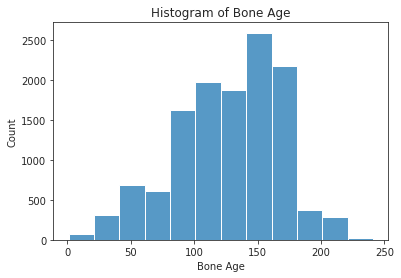

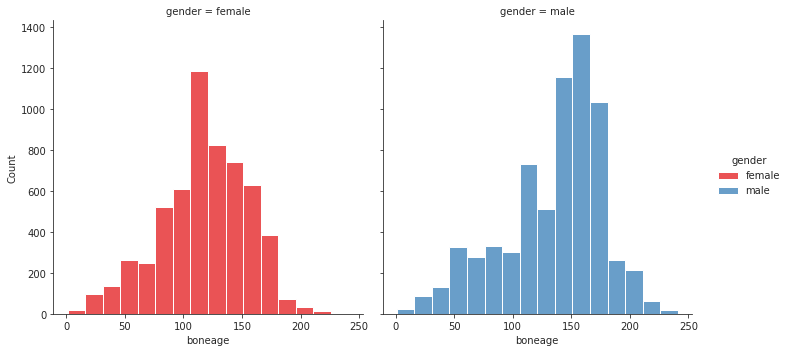

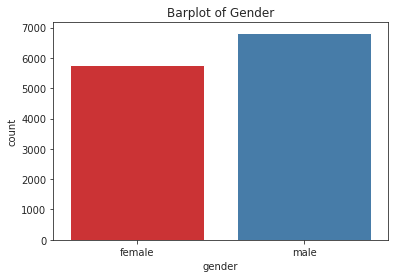

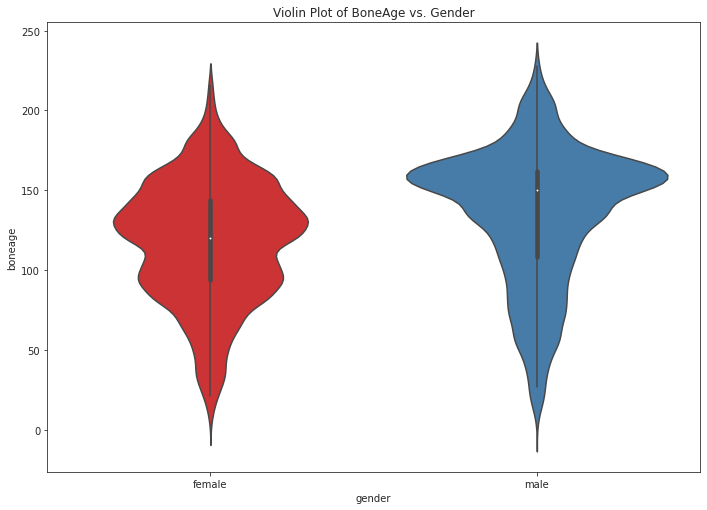

In [ ]:
train_df["gender"]= train_df["male"].apply(lambda x:"male" if x else "female")
print(train_df.head())
print("\n")
printmd("**Summary:**")
print(train_df.describe())

sea.histplot(data=train_df["boneage"],binwidth=20)

print("\n")
plt.xlabel("Bone Age")
plt.title('Histogram of Bone Age')
plt.show()

print("\n")
#Per gender group hist()
sea.displot(train_df, x="boneage", col="gender", multiple="dodge", hue="gender",binwidth=15,palette="Set1")
plt.show()

print("\n")
#Barplot for gender
sea.countplot(x="gender",data=train_df, palette="Set1")
plt.title("Barplot of Gender")
plt.show()

print("\n")
#Violin/boxplot
sea.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sea.violinplot(x='gender', y='boneage', data=train_df, kind="box", palette="Set1",ax=ax)
plt.title("Violin Plot of BoneAge vs. Gender")
plt.show()


In [ ]:
###### End of EDA ########

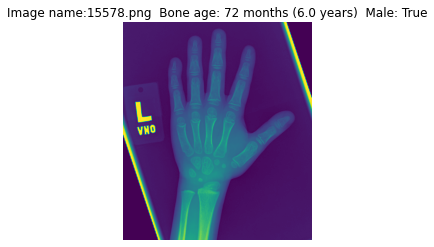

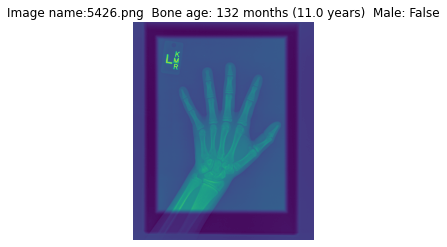

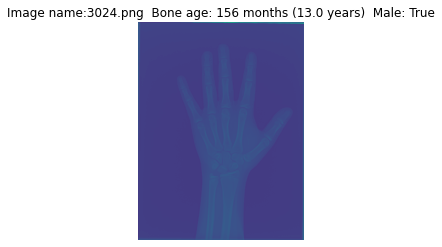

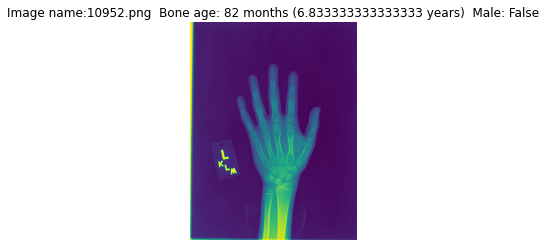

In [ ]:
import matplotlib.image as mpimg
for filename, boneage, male in train_df[['id','boneage','male']].sample(4).values:
    img = mpimg.imread('boneage-training-dataset/boneage-training-dataset/'+ filename)
    plt.imshow(img)
    plt.title('Image name:{}  Bone age: {} months ({} years)  Male: {}'.format(filename, boneage, boneage/12, male))
    plt.axis('off')
    plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,      
                                   shear_range = 0.2,    
                                   zoom_range = 0.2,     
                                   horizontal_flip = True) 

train_set = train_datagen.flow_from_dataframe(dataframe = train_df,
                                              directory = 'boneage-training-dataset/boneage-training-dataset',  
                                              x_col = 'id',
                                              y_col = "boneage",
                                              target_size = (150, 150),
                                              batch_size = 50,        
                                              class_mode = 'raw',
                                              seed = 2)  

#train_set = train_datagen.flow_from_directory('boneage-training-dataset',  
#                                                 target_size = (150, 150),
#                                                 batch_size = 50,        
#                                                 class_mode = 'other')  

Found 12611 validated image filenames.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)  


test_set = test_datagen.flow_from_directory(
    directory = 'boneage-test-dataset',
    class_mode = None,
    target_size = (150,150))

#test_set = test_datagen.flow_from_directory('boneage-test-dataset',     
#                                            target_size = (150, 150),
#                                            batch_size = 50,
#                                            class_mode = 'other')

Found 200 images belonging to 1 classes.
